<a href="https://colab.research.google.com/github/Ujanghost/QuantumLatticeSim/blob/main/QuantumLatticeSim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Simulation of a Boson in a 1D Lattice: Time Evolution and Entanglement Entropy

#### Introduction
In quantum mechanics, bosons are particles that obey Bose-Einstein statistics. When studying the behavior of a boson in a discrete one-dimensional (1D) lattice, the tight-binding model provides a useful approximation. This model allows us to simulate the propagation and the quantum state evolution of a boson over time. Additionally, the concept of entanglement entropy provides insight into the degree of quantum entanglement between different parts of the system. This document outlines the problem, the equations involved, and the steps to simulate and visualize the time evolution of a boson in a 1D lattice and the change in entanglement entropy.

#### Problem Statement
The goal is to simulate the time evolution of a single boson in a 1D lattice using the tight-binding model and to compute the change in entanglement entropy over time. The entanglement entropy will be calculated for a bipartition of the lattice, where the lattice is divided into two equal halves.

#### Equations and Methodology

1. **Hamiltonian of the System**:
   The Hamiltonian for a boson in a 1D lattice in the tight-binding approximation is given by:
   \[
   H = -t \sum_{i} \left( |i\rangle \langle i+1| + |i+1\rangle \langle i| \right)
   \]
   where \( t \) is the hopping amplitude, and \( |i\rangle \) represents the state of the boson at site \( i \).

2. **Initial State**:
   The initial wavefunction \( \psi_0 \) is chosen such that the boson is initially localized at the center of the lattice:
   \[
   \psi_0 = \delta_{i, N/2}
   \]
   where \( N \) is the number of lattice sites.

3. **Time Evolution**:
   The time evolution of the wavefunction is governed by the Schrödinger equation. The time evolution operator \( U \) for a small time step \( \Delta t \) is:
   \[
   U = e^{-iH \Delta t}
   \]
   The wavefunction at time \( t \) can be computed iteratively using:
   \[
   \psi(t + \Delta t) = U \psi(t)
   \]

4. **Entanglement Entropy**:
   The entanglement entropy \( S \) for a bipartition of the system is calculated from the reduced density matrix \( \rho_A \) of one half of the lattice. The entropy is given by:
   \[
   S = -\sum_{i} \lambda_i \log \lambda_i
   \]
   where \( \lambda_i \) are the eigenvalues of \( \rho_A \). The reduced density matrix \( \rho_A \) is obtained by tracing out the degrees of freedom of the second half of the lattice from the total density matrix \( \rho = |\psi\rangle \langle \psi| \).

#### Implementation in Python

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Parameters
N = 10  # Number of sites
t = 1.0  # Hopping amplitude
dt = 0.01  # Time step
num_steps = 100  # Number of time steps

# Initial state: boson at the center of the lattice
psi_0 = np.zeros(N, dtype=complex)
psi_0[N // 2] = 1

# Hamiltonian matrix
H = np.zeros((N, N), dtype=complex)
for i in range(N - 1):
    H[i, i + 1] = -t
    H[i + 1, i] = -t

# Time evolution operator
U = expm(-1j * H * dt)

# Function to compute the wavefunction at each time step
def time_evolution(psi_0, U, num_steps):
    psi_t = [psi_0]
    psi = psi_0
    for _ in range(num_steps):
        psi = U @ psi
        psi_t.append(psi)
    return np.array(psi_t)

# Function to calculate the entanglement entropy of the wavefunction
def entanglement_entropy(psi, N):
    # Density matrix
    rho = np.outer(psi, np.conj(psi))
    
    # Reduced density matrix for the first half of the system
    L = N // 2
    rho_A = rho[:L, :L] + rho[L:, L:]
    
    # Eigenvalues of the reduced density matrix
    eigenvalues = np.linalg.eigvalsh(rho_A)
    
    # Compute the entanglement entropy
    entropy = -np.sum(eigenvalues * np.log(eigenvalues + 1e-12))  # small offset to avoid log(0)
    return entropy

# Compute the time evolution
psi_t = time_evolution(psi_0, U, num_steps)

# Compute the entanglement entropy at each time step
entropies = [entanglement_entropy(psi, N) for psi in psi_t]

# Plot the probability distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for n in range(0, num_steps + 1, num_steps // 10):
    plt.plot(np.abs(psi_t[n])**2, label=f't={n*dt:.2f}')
plt.xlabel('Site index')
plt.ylabel('Probability')
plt.legend()
plt.title('Time Evolution of a Boson in a 1D Lattice')

# Plot the entanglement entropy
plt.subplot(1, 2, 2)
plt.plot(np.arange(num_steps + 1) * dt, entropies)
plt.xlabel('Time')
plt.ylabel('Entanglement Entropy')
plt.title('Change in Entanglement Entropy Over Time')

plt.tight_layout()
plt.show()
```

#### Author
[Your Name]

#### References
- A. Altland and B. Simons, *Condensed Matter Field Theory*, 2nd ed. Cambridge University Press, 2010.
- R. Shankar, *Principles of Quantum Mechanics*, 2nd ed. Springer, 1994.
- M. A. Nielsen and I. L. Chuang, *Quantum Computation and Quantum Information*, 10th Anniversary Edition. Cambridge University Press, 2010.

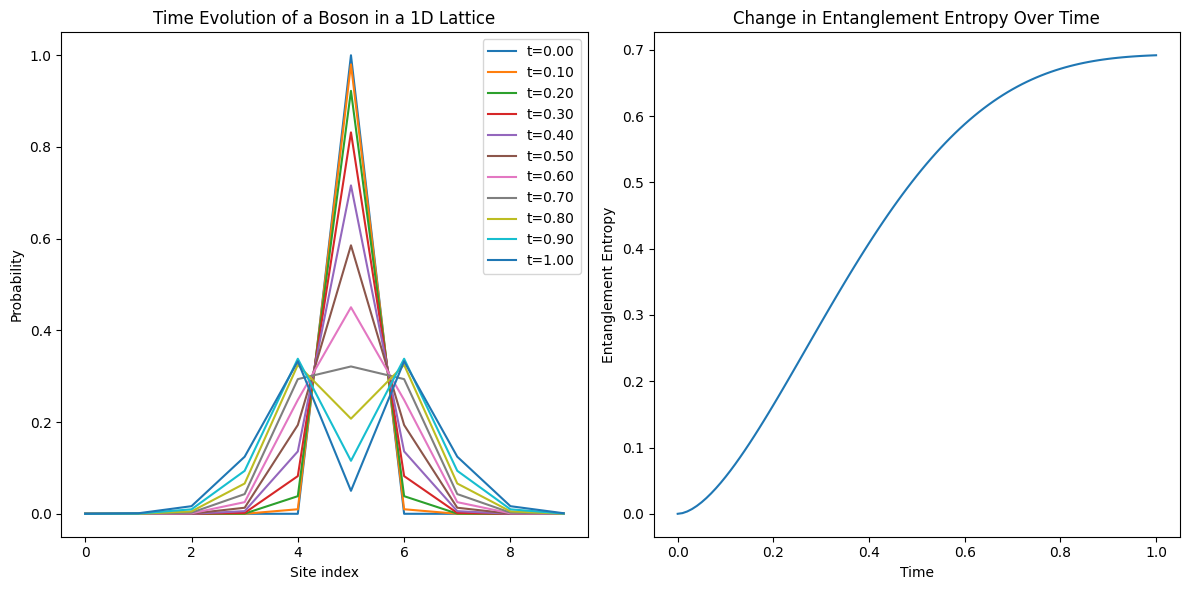

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Parameters
N = 10  # Number of sites
t = 1.0  # Hopping amplitude
dt = 0.01  # Time step
num_steps = 100  # Number of time steps

# Initial state: boson at the center of the lattice
psi_0 = np.zeros(N, dtype=complex)
psi_0[N // 2] = 1

# Hamiltonian matrix
H = np.zeros((N, N), dtype=complex)
for i in range(N - 1):
    H[i, i + 1] = -t
    H[i + 1, i] = -t

# Time evolution operator
U = expm(-1j * H * dt)

# Function to compute the wavefunction at each time step
def time_evolution(psi_0, U, num_steps):
    psi_t = [psi_0]
    psi = psi_0
    for _ in range(num_steps):
        psi = U @ psi
        psi_t.append(psi)
    return np.array(psi_t)

# Function to calculate the entanglement entropy of the wavefunction
def entanglement_entropy(psi, N):
    # Density matrix
    rho = np.outer(psi, np.conj(psi))

    # Reduced density matrix for the first half of the system
    L = N // 2
    rho_A = rho[:L, :L] + rho[L:, L:]

    # Eigenvalues of the reduced density matrix
    eigenvalues = np.linalg.eigvalsh(rho_A)

    # Compute the entanglement entropy
    entropy = -np.sum(eigenvalues * np.log(eigenvalues + 1e-12))  # small offset to avoid log(0)
    return entropy

# Compute the time evolution
psi_t = time_evolution(psi_0, U, num_steps)

# Compute the entanglement entropy at each time step
entropies = [entanglement_entropy(psi, N) for psi in psi_t]

# Plot the probability distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for n in range(0, num_steps + 1, num_steps // 10):
    plt.plot(np.abs(psi_t[n])**2, label=f't={n*dt:.2f}')
plt.xlabel('Site index')
plt.ylabel('Probability')
plt.legend()
plt.title('Time Evolution of a Boson in a 1D Lattice')

# Plot the entanglement entropy
plt.subplot(1, 2, 2)
plt.plot(np.arange(num_steps + 1) * dt, entropies)
plt.xlabel('Time')
plt.ylabel('Entanglement Entropy')
plt.title('Change in Entanglement Entropy Over Time')

plt.tight_layout()
plt.show()
